# This is a Jupyter Notebook

A Jupyter Notebook is a data-science coding environment that combines three types of content:

  - Narrative: The text describing your analysis
  - Code: The program that does the analysis
  - Results: The output of the program
    
The Jupyter environment was created by Fernando Perez at the University of California, Berkeley. 
These ideas are now used in a lot of different technologies (e.g., Google Collab).

## Example for Day 1

Note: In this lecture there is a lot of code. You are not expected to know any of this yet, so don't worry. This is just a preview of the things you will see in the next few weeks.

We can use the tools of data science to study text. For example, here we will do some basic analysis of "Adventures of Huckleberry Finn" (by Mark Twain) and "Little Women" (by Louisa May Alcott).

Often the first step in data science is getting the data. The following block suppresses some annoying warnings and defines a function, `read_url`, for downloading text from the web.

In [1]:
# Supresses annoying warnings
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Defines a function to download text from the web based on a given URL
def read_url(url): 
    from urllib.request import urlopen 
    import re
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

Now we download the content of the two novels from the [Inferential Thinking](https://inferentialthinking.com/chapters/intro.html) textbook website.

In [2]:
# This block gets the text of Huckleberry Finn and splits it into its chapters
huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

In [3]:
# This block gets the text of Little Women and splits it into its chapters
little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

The `string.split()` method has converted each novel's text into a list of strings, one long string of
characters for each chapter. So the data type of `huck_finn_chapters` is `list`.

In [4]:
type(huck_finn_chapters)

list

In [5]:
# For example, we can look at the first chapter, which is at index 0
huck_finn_chapters[0]

'I. YOU don\'t know about me without you have read a book by the name of The Adventures of Tom Sawyer; but that ain\'t no matter. That book was made by Mr. Mark Twain, and he told the truth, mainly. There was things which he stretched, but mainly he told the truth. That is nothing. I never seen anybody but lied one time or another, without it was Aunt Polly, or the widow, or maybe Mary. Aunt Polly--Tom\'s Aunt Polly, she is--and Mary, and the Widow Douglas is all told about in that book, which is mostly a true book, with some stretchers, as I said before. Now the way that the book winds up is this: Tom and me found the money that the robbers hid in the cave, and it made us rich. We got six thousand dollars apiece--all gold. It was an awful sight of money when it was piled up. Well, Judge Thatcher he took it and put it out at interest, and it fetched us a dollar a day apiece all the year round--more than a body could tell what to do with. The Widow Douglas she took me for her son, and a

In [6]:
# Here is the second chapter.
huck_finn_chapters[1]

'II. WE went tiptoeing along a path amongst the trees back towards the end of the widow\'s garden, stooping down so as the branches wouldn\'t scrape our heads. When we was passing by the kitchen I fell over a root and made a noise. We scrouched down and laid still. Miss Watson\'s big nigger, named Jim, was setting in the kitchen door; we could see him pretty clear, because there was a light behind him. He got up and stretched his neck out about a minute, listening. Then he says: "Who dah?" He listened some more; then he come tiptoeing down and stood right between us; we could a touched him, nearly. Well, likely it was minutes and minutes that there warn\'t a sound, and we all there so close together. There was a place on my ankle that got to itching, but I dasn\'t scratch it; and then my ear begun to itch; and next my back, right between my shoulders. Seemed like I\'d die if I couldn\'t scratch. Well, I\'ve noticed that thing plenty times since. If you are with the quality, or at a fun

## Working with Tables

A lot of data science is about transforming data, often producing tables that we can more easily analyze. In this class you will use the Berkeley `datascience` module (a Python library) to manipulate and visualize data. In Python, `import *` means "import everything".

In [7]:
from datascience import *

In [8]:
# Create a 1-column table of the Huck Finn chapters
t = Table().with_column('Chapters', huck_finn_chapters)
t

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


We will explore data by extracting summaries. For example, we might ask, **how often did the names of the main characters of the novel appear in each chapter**. We can use snippets of code to answer these questions.

In [9]:
# We will use the Numpy module for Numerical Python computing
import numpy as np

In [10]:
# Numpy lets us easily count the occurrences of 'Tom' in each chapter
np.char.count(huck_finn_chapters, 'Tom')

array([ 6, 24,  5,  0,  0,  0,  2,  2,  0,  0,  2,  3,  1,  0,  0,  0,  3,
        5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  4, 19, 15,
       14, 18,  9, 32, 11, 11,  8, 30,  6])

In [11]:
np.char.count(huck_finn_chapters, 'Jim')

array([ 0, 16,  0,  8,  0,  0,  0, 22, 11, 19,  4, 20,  9,  6, 16, 28,  0,
       10, 13, 18,  1,  0,  9,  5,  0,  0,  0,  1,  3,  5, 17,  0,  5, 17,
       18, 23,  4, 27, 10, 13,  0, 12,  6])

In [12]:
np.char.count(huck_finn_chapters, 'Huck')

array([ 3,  2,  2,  1,  0,  2,  0,  5,  1,  0,  4,  0,  0,  5,  7, 10,  0,
        1,  0,  1,  0,  0,  7,  1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  4,
        8,  1,  0,  2,  0,  3,  0,  2,  4])

We can collect the results of our analysis in a new table, `counts`:

In [13]:
counts = Table().with_columns([
    'Tom', np.char.count(huck_finn_chapters, 'Tom'),
    'Jim', np.char.count(huck_finn_chapters, 'Jim'),
    'Huck', np.char.count(huck_finn_chapters, 'Huck'),
])
counts

Tom,Jim,Huck
6,0,3
24,16,2
5,0,2
0,8,1
0,0,0
0,0,2
2,0,0
2,22,5
0,11,1
0,19,0


## We will Learn to Visualize Data

Let's make a plot of the cumulative counts: How many times in Chapter 1, how many times in Chapters 1 and 2, and so on, was each of the main characters mentioned by name?

In [14]:
# matplotlib is a comprehensive library for creating visualizations in Python
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [15]:
# by converting the table to a "Pandas Dataframe", we can access extra functionality like cumsum()
cum_counts = counts.to_df()

cum_counts = Table.from_df(cum_counts.cumsum(), True).with_column('Chapter', np.arange(1, 44, 1))
cum_counts = cum_counts.drop('index')
cum_counts

Tom,Jim,Huck,Chapter
6,0,3,1
30,16,5,2
35,16,7,3
35,24,8,4
35,24,8,5
35,24,10,6
37,24,10,7
39,46,15,8
39,57,16,9
39,76,16,10


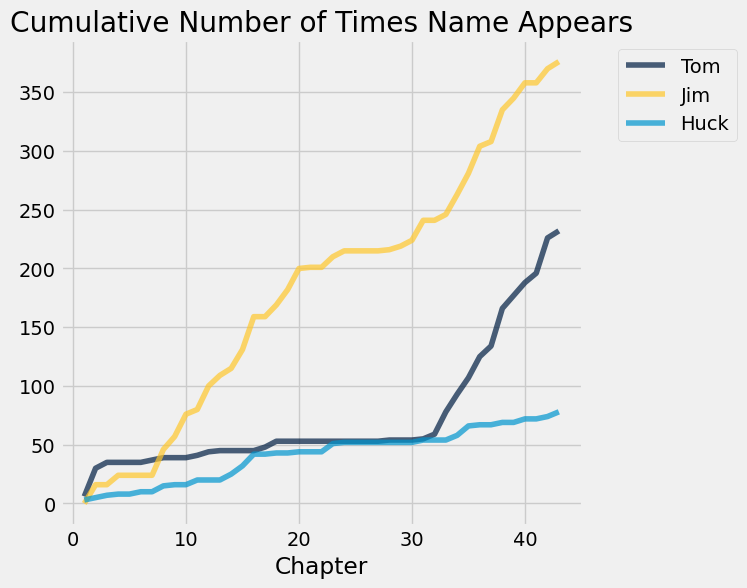

In [16]:
# Make a plot
cum_counts.plot(column_for_xticks="Chapter")
plt.title('Cumulative Number of Times Name Appears');
plt.show();

What can we tell from this visualization? What questions does this raise?

We can explore the characters in Little Women using the same kind of analysis.

In [17]:
# Counts of names in the chapters of Little Women
names = ['Amy', 'Beth', 'Jo', 'Laurie', 'Meg']
mentions = {name: np.char.count(little_women_chapters, name) for name in names}  # makes a dictionary
counts = Table().with_columns([
        'Amy', mentions['Amy'],
        'Beth', mentions['Beth'],
        'Jo', mentions['Jo'],
        'Laurie', mentions['Laurie'],
        'Meg', mentions['Meg']
    ])
counts

Amy,Beth,Jo,Laurie,Meg
23,26,44,0,26
13,12,21,0,20
2,2,62,16,36
14,18,34,0,17
6,14,55,35,13
6,28,13,9,5
27,5,9,7,5
48,9,71,17,16
3,5,21,24,71
5,5,12,4,4


In [18]:
cum_counts = counts.to_df()
cum_counts = Table.from_df(cum_counts.cumsum(), True).with_column('Chapter', np.arange(1, 48, 1))
cum_counts = cum_counts.drop('index')
cum_counts

Amy,Beth,Jo,Laurie,Meg,Chapter
23,26,44,0,26,1
36,38,65,0,46,2
38,40,127,16,82,3
52,58,161,16,99,4
58,72,216,51,112,5
64,100,229,60,117,6
91,105,238,67,122,7
139,114,309,84,138,8
142,119,330,108,209,9
147,124,342,112,213,10


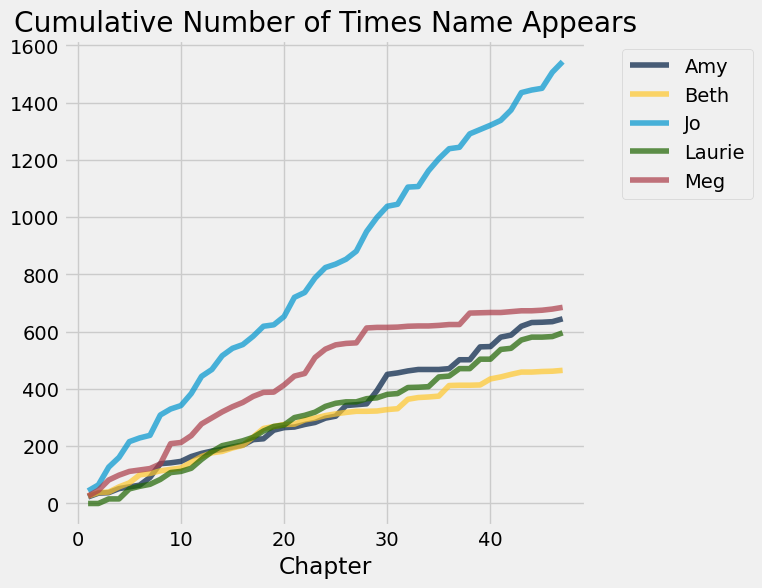

In [19]:
cum_counts.plot(column_for_xticks="Chapter")
plt.title('Cumulative Number of Times Name Appears');
plt.show();

  - What can we learn from the Little Women visualization?

Let's consider another angle on these novels, using the built-in `len()` function.

In [20]:
len('January 8th!')

12

`len` is for finding the length of something using Python, counting the letters, digits, spaces, etc.

In [21]:
len('abc 123')

7

In [22]:
# In each chapter, count the number of characters (letters, digits, etc.) and the number of periods
# A period typically ends a sentence

# Counts for Huck Finn:
length_hf = Table().with_columns([
    'length', [len(s) for s in huck_finn_chapters], 
    'periods', np.char.count(huck_finn_chapters, '.')
])
length_hf

length,periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


In [23]:
# Counts for Little Women:
length_lw = Table().with_columns([
    'length', [len(s) for s in little_women_chapters], 
    'periods', np.char.count(little_women_chapters, '.')
])
length_lw

length,periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


What do you notice when you compare the two tables?

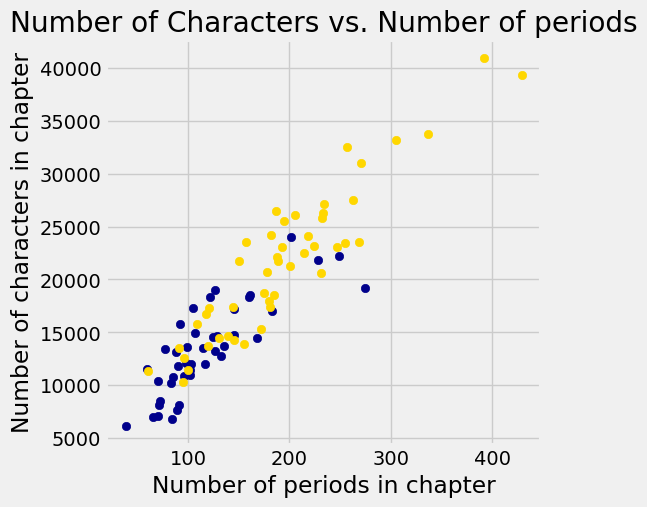

In [24]:
# Build a visualization (scatterplot)
plt.figure(figsize=(5, 5))
plt.scatter(length_hf[1], length_hf[0], color='darkblue')
plt.scatter(length_lw[1], length_lw[0], color='gold')
plt.title('Number of Characters vs. Number of periods');
plt.xlabel('Number of periods in chapter')
plt.ylabel('Number of characters in chapter');
plt.show()